In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Data Exploration

In [3]:
import pandas as pd
df = pd.read_csv('OnlineNewsPopularity2.csv', sep=',')
df_final = pd.read_csv('OnlineNewsPopularityCleaned.csv', sep=',')

In [4]:
share = df.values[:,46]
share_df = pd.DataFrame(share)

{'whiskers': [<matplotlib.lines.Line2D at 0x10238e080>,
 'caps': [<matplotlib.lines.Line2D at 0x10238e940>,
 'boxes': [<matplotlib.lines.Line2D at 0x10237bef0>],
 'medians': [<matplotlib.lines.Line2D at 0x10239a1d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x10239a5f8>],
 'means': []}

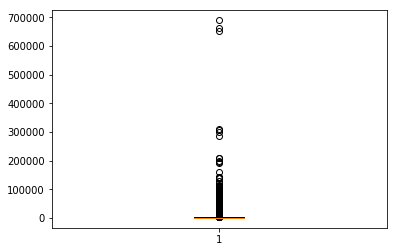

In [5]:
plt.boxplot(share)

In [6]:
print (share_df.describe())

                   0
count   33510.000000
mean     2928.637989
std      9470.520277
min         1.000000
25%       930.000000
50%      1400.000000
75%      2500.000000
max    690400.000000


From the boxplot and statisitcs summary, we could see that the target column "share" has a large numbers of outliers. We will need to consider the influence of the outliers when building the model.

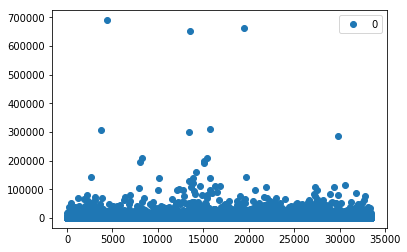

In [7]:
share_df.plot(style='o')

(array([22807.,  5952.,  1903.,   942.,   492.,   339.,   222.,   137.,
          144.,    91.]),
 array([1.00000e+00, 2.00090e+03, 4.00080e+03, 6.00070e+03, 8.00060e+03,
        1.00005e+04, 1.20004e+04, 1.40003e+04, 1.60002e+04, 1.80001e+04,
        2.00000e+04]),
 <a list of 10 Patch objects>)

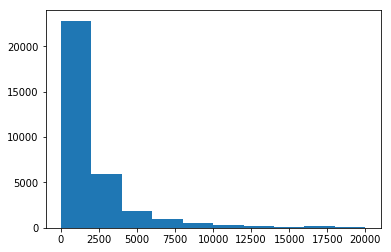

In [8]:
plt.hist(share,10, range = [1,20000])

### Feature Selection -  Covariance Matrix

In [10]:
df2 = pd.read_csv('OnlineNewsPopularity4.csv', sep=',')

In [11]:
len(df2.columns)

27

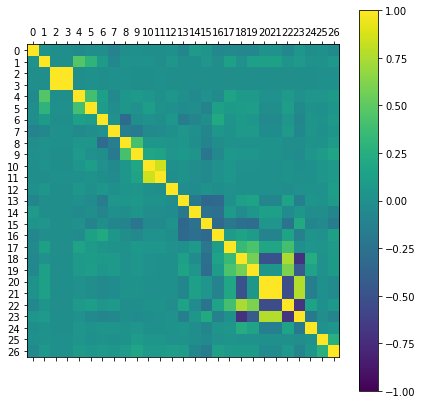

In [12]:
correlations = df2.corr()
# plot correlation matrix
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,27,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

In [14]:
df3 = pd.read_csv('OnlineNewsPopularityCleaned.csv', sep=',')

After examined the covariance matrix, I eliminated 6 correlated variables. 

In [15]:
len(df3.columns)

21

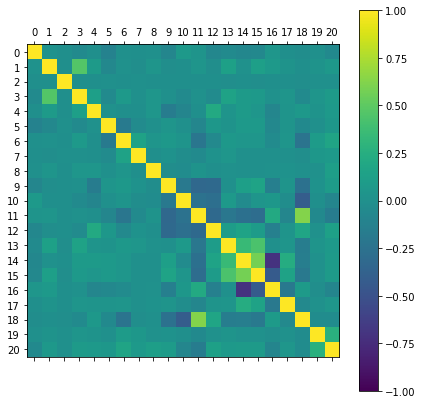

In [16]:
correlations2 = df3.corr()
# plot correlation matrix
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations2, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,21,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

Looks good now!

(-1.1056518260439765,
 1.1109528557277355,
 -1.1083132495660935,
 1.1003959195698367)

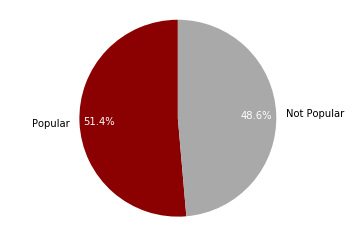

In [18]:
sizes = [17216,16294]
labels = ['Popular', 'Not Popular']
colors = ['DarkRed','DarkGrey']
_, _, autotexts = pie(sizes,labels = labels,autopct='%1.1f%%',pctdistance=0.8,startangle=90,colors=colors)
for autotext in autotexts:
    autotext.set_color('white')
plt.axis('equal')

In [ ]:
#data = df_final.values

#print(data.shape)

#target = data[1:,-1]
#print (target)
#print (target.shape)

#features= data[1:,0:19]
#print(features.shape)

#from sklearn.model_selection import train_test_split
#train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 42)

#print('Training Features Shape:', train_features.shape)
#print('Training Labels Shape:', train_target.shape)
#print('Testing Features Shape:', test_features.shape)
#print('Testing Labels Shape:', test_target.shape)

#from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
#rf.fit(train_features, train_target)

#predictions = rf.predict(test_features)

#print ("Number of mislabeled points out of a total %d points: %d" 
#       % (test_target.size, (predictions!=test_target).sum()))

#from sklearn.model_selection import cross_val_score
#cross_val_score(rf, features,target, cv=5)

## PCA

In [8]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3, whiten=True)
pca_feature = pca.fit_transform(features2)

## Random Forest

### Use New Data (2 Classes)

In [3]:
import pandas as pd
df_t2 = pd.read_csv('OnlineNewsPopularityCleaned2.csv', sep=',')
data2 = df_t2.values 

In [6]:
print(pca_data.shape)

(33510, 3)


In [4]:
target2 = data2[1:,-1]
features2= data2[1:,:19]

In [21]:
print(features2.shape)

(33509, 19)


In [10]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=300,max_depth=15,max_features=5)

/usr/local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [22]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(features2, target2, test_size = 0.2, random_state = 42)

In [23]:
train_features.shape

(26807, 19)

In [10]:
rf2.fit(train_features, train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
feature_importances = pd.DataFrame(rf2.feature_importances_,
                                   index = train_features_df.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)

In [24]:
train_features_df = pd.DataFrame(train_features)

In [16]:
feature_importances

,importance
6,0.104221
7,0.074363
11,0.068016
2,0.061305
12,0.061249
9,0.060852
10,0.059724
1,0.056258
15,0.055799
14,0.055703


In [12]:
from sklearn.ensemble import RandomForestClassifier
rf3 = RandomForestClassifier(n_estimators=300,max_depth=3,max_features=3)

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf3, pca_feature,target2, cv=5)

array([0.55452782, 0.60265592, 0.61235452, 0.61468438, 0.62527981])

In [15]:
np.mean([0.61241235, 0.65666965, 0.65756491, 0.67452619, 0.66706462])

0.653647544

The mean CV score for the random forest is 65%

In [14]:
np.mean([0.55452782, 0.60265592, 0.61235452, 0.61468438, 0.62527981])

0.60190049

PCA doesn't really improve the performance. The reason behind this is that after the feature selection, the original dataset doesn't contain any correalted features. So PCA just makes us lose information.